# Intro to Data Science with Python

# What you will need...

First, upload the `titanic.csv` 

In [ ]:
!pip install numpy

In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

In [1]:
!pip install sklearn

# Get the THE BASIC math first -> statistics

In [ ]:
import numpy as np

data = [15, 16, 18, 19, 22, 24, 29, 30, 34]

print("mean:", np.mean(data)) #rata rata
print("median:", np.median(data)) #nilai tengah
print("50th percentile (median):", np.percentile(data, 50))
print("25th percentile:", np.percentile(data, 25))
print("75th percentile:", np.percentile(data, 75))
print("standard deviation:", np.std(data)) #standar deviasi (akar dari variance) 
print("variance:", np.var(data)) #variansi: data sum kuadratnya, dibagi jumlah data

mean: 23.0
median: 22.0
50th percentile (median): 22.0
25th percentile: 18.0
75th percentile: 29.0
standard deviation: 6.342099196813483
variance: 40.22222222222222


# Next, Pandas!

In [ ]:
import pandas as pd
#pandas bakal mengolah data, dan menyimpannya di **dataframe**
df=pd.read_csv('titanic.csv')
display(df.head()) #head =  5 data pertama 
display(df.describe()) #ingat statistics basic yang tadi?
#pandas juga bisa cuman 1 row
#select cuman fare:
col = df['Fare']
print(col)
# select beberapa aja
small_df=df[['Age','Sex','Survived']] #DOUBLE SQUARED BRACKETS
print(small_df.head())
#buat series baru dari data yang awal, terus nilainya true kalau male
df['isMale']=df['Sex']=='male'
print(df.head())

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


,Survived,Pclass,Age,Siblings/Spouses,Parents/Children,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
882    13.0000
883    30.0000
884    23.4500
885    30.0000
886     7.7500
Name: Fare, Length: 887, dtype: float64
    Age     Sex  Survived
0  22.0    male         0
1  38.0  female         1
2  26.0  female         1
3  35.0  female         1
4  35.0    male         0
   Survived  Pclass     Sex  ...  Parents/Children     Fare  isMale
0         0       3    male  ...                 0   7.2500    True
1         1       1  female  ...                 0  71.2833   False
2         1       3  female  ...                 0   7.9250   False
3         1       1  female  ...                 0  53.1000   False
4         0       3    male  ...                 0   8.0500    True

[5 rows x 8 columns]


#Good to go, now Numpy

In [1]:
import pandas as pd

#konversi pandas dataset menjadi numpy array, pertama kita konversi fare dulu
#0, deklarasi data apa yang mau kita pake
#1, ambil fare di pandas, terus coba print VALUES nya

df=pd.read_csv('titanic.csv') #0)
print(df['Fare'].values) #1) ini hasilnya bakal array 1 dimensi yang elemennya nilai2 Fare
#karena pandas berdiri diatas numpy, jadi santai aja sampe sini belum perlu import numpy even kita belajar numpy
print('\n')
#atau, bisa konversi ke array 2 dimensi pakai .values juga
arr=df[['Pclass','Fare','Age']].values
print(arr)
print('\n')
#numpy punya .shape, untuk melihat ukuran 2d array yang dia handle
print("array kita ada x baris dan y kolom (x,y):")
print(arr.shape)
#well si arr udah berupa numpy array 
print('\n')
print('spesifik,baris pertama (0, orang pertama) kolom kedua (1, Fare) :');print(arr[0,1])
print('seluruh isi dalam baris 0 (orang pertama): ');print(arr[0])
print('seluruh isi dalam kolom 2 (Age): ')
print(arr[:,2]);print('\n')
print('\nMasking: ')
mask=arr[:,2]<18 #ambil yang agenya dibawah 18 aja
print(arr[mask])#pasang filter buat tampilin data yang dibawah 18 aja
#atau arr[arr[:,2]<18] juga bisa sama aja
print('total anak-anak yang selamat:')
print(mask.sum())
#atau print((arr[arr[:,2]<18),sum()) juga bisa



[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55     8.05    31.275    7.8542  16.
  29.125   13.      18.       7.225   26.      13.       8.0292  35.5
  21.075   31.3875   7.225  263.       7.8792   7.8958  27.7208 146.5208
   7.75    10.5     82.1708  52.       7.2292   8.05    18.      11.2417
   9.475   21.      41.5792   7.8792   8.05    15.5      7.75    21.6792
  17.8     39.6875   7.8     76.7292  26.      61.9792  35.5     10.5
   7.2292  27.75    46.9      7.2292  80.      83.475   27.9     27.7208
  15.2458  10.5      8.1583   7.925    8.6625  10.5     46.9     73.5
  14.4542  56.4958   7.65     7.8958   8.05    29.      12.475    9.
   9.5      7.7875  47.1     10.5     15.85    34.375    8.05   263.
   8.05     8.05     7.8542  61.175   20.575    7.25     8.05    34.6542
  63.3583  23.      26.       7.8958   7.8958  77.2875   8.6542   7.925
   7.8958   7.65     7.775    7.8958  24.15    52.      14.4542   8.05
   

#It's Drawing Time, Plotting!

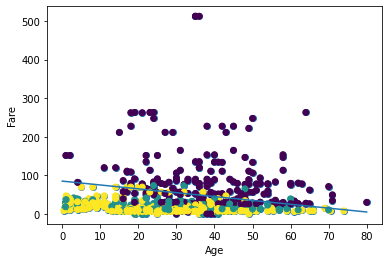

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv('titanic.csv')
plt.scatter(df['Age'],df['Fare'])
#format si scatter itu akan di plot scatter (x,y)
plt.xlabel('Age');plt.ylabel('Fare')
#Kasih nama biar ga bingung
plt.scatter(df['Age'],df['Fare'],c=df['Pclass'])
#c itu ngasih warna (colour)
#s itu ngasih ukuran (size)
plt.plot([0, 80], [85, 5])
#ngasih garis dari x1 y1 ke x2 y2
plt.show()
#tampilkan

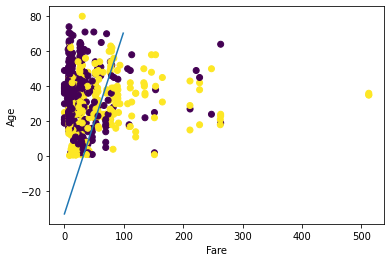

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df=pd.read_csv('titanic.csv')
plt.scatter(df['Fare'],df['Age'],c=df['Survived'])
plt.xlabel('Fare');plt.ylabel('Age')
#kita plot dulu semua yang selamat apa engga, kelompok umur, dan apa mereka selamat apa engga
#plot.show()

# The task of a linear model is to find the line that best separates the two classes, 
# so that the yellow points are on one side and the purple points are on the other.
# dengan logistic regression kita mencari sebuah garis yang bisa membagi antara ungu dan kuning, hasilnya:
x=np.array(range(100))
y = 1.04318*x -32.9471
plt.plot(x,y,label='y=x-30')
plt.show()

##how that line could be there? -> Logistic Regression

In [12]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
df=pd.read_csv('titanic.csv')
df['male']= df['Sex']=='male'
x= df[['Fare','Age']].values
y= df['Survived'].values
print(x)
print(y)
model = LogisticRegression()
model.fit(x,y)
print(model.coef_,model.intercept_);
#[[ 0.01615949 -0.01549065]] [-0.51037152] artinya garis pemisah => 0=0.01615949x + -0.01549065y + -0.51037152
X=df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
model.fit(X,y)
print (model.predict(X[:5]))
print (y[:5])
#accuracy score:
y_pred=model.predict(X) #y_pred isi dari semua prediksi dari target which is y
totalTrue = (y==y_pred).sum()
print (totalTrue)
totalPassenger = y.shape[0]
print (totalPassenger)
print ("Akurasi prediksi: ");print(totalTrue/totalPassenger)

[[ 7.25   22.    ]
 [71.2833 38.    ]
 [ 7.925  26.    ]
 ...
 [23.45    7.    ]
 [30.     26.    ]
 [ 7.75   32.    ]]
[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0
 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1
 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0
 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1
 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0
 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 